In [ ]:
!apt-get install -y \
    libgl1-mesa-dev \
    libgl1-mesa-glx \
    libglew-dev \
    libosmesa6-dev \
    software-properties-common > /dev/null 2>&1

!apt-get install -y patchelf > /dev/null 2>&1
!pip install gym > /dev/null 2>&1
!pip install free-mujoco-py > /dev/null 2>&1

!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1

!pip install stable-baselines3 sb3-contrib > /dev/null 2>&1

**Now you need to restart the runtime as numpy is apparently automatically imported...**

In [ ]:
import mujoco_py
import gym

Compiling /usr/local/lib/python3.7/dist-packages/mujoco_py/cymj.pyx because it changed.
[1/1] Cythonizing /usr/local/lib/python3.7/dist-packages/mujoco_py/cymj.pyx
running build_ext
building 'mujoco_py.cymj' extension
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder/temp.linux-x86_64-3.7
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder/temp.linux-x86_64-3.7/usr
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder/temp.linux-x86_64-3.7/usr/local
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder/temp.linux-x86_64-3.7/usr/local/lib
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuexten

In [ ]:
#clear video folder
!rm -rf video

In [ ]:
import gym
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) #error only
import mujoco_py
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML

from IPython import display as ipythondisplay

#wrapper to design own rewards, ref: https://github.com/openai/gym/tree/master/gym/wrappers

class RewardWrapper(gym.RewardWrapper):
    def __init__(self, env):
        super().__init__(env)
    
    def reward(self, rew):
        # modify rew
        # res = rew * (math.degrees(self.sim.data.qpos[23]) / 180)
        # res = np.sum(np.transpose(env.sim.data.xipos)[2])
        res = rew + (np.sqrt(np.sum(np.square(env.sim.data.xipos[13]-env.sim.data.xipos[11]))) * 4)
        #fig = plt.figure(figsize=(4,4))
        #ax = fig.add_subplot(111, projection='3d')
        #t = np.transpose(env.sim.data.xipos)
        #ax.scatter(t[0],t[1],t[2]) # plot the point (2,3,4) on the figure
        #plt.show()

        return res

#monitor required for getting video output on colab
env = Monitor(RewardWrapper(gym.make("Humanoid-v2")), './video', force=True)

In [ ]:
np.sqrt(np.sum(np.square(env.sim.data.xipos[13]-env.sim.data.xipos[11])))

0.572720915735004

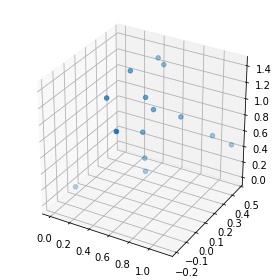

In [ ]:


fig = plt.figure(figsize=(4,4))

ax = fig.add_subplot(111, projection='3d')

t = np.transpose(env.sim.data.xipos)
ax.scatter(t[0],t[1],t[2]) # plot the point (2,3,4) on the figure

plt.show()

In [ ]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

In [ ]:
model.learn(total_timesteps=500_000,log_interval=10,reset_num_timesteps=False)

In [ ]:
model.save("Test-SelfReward-DistHand-3")

In [ ]:
model.learn(total_timesteps=10_000_000,log_interval=50,reset_num_timesteps=False)
model.save("Test-SelfReward-DistHand-3")

----------------------------------------
| rollout/                  |          |
|    ep_len_mean            | 99.2     |
|    ep_rew_mean            | 1.08e+03 |
| time/                     |          |
|    fps                    | 467      |
|    iterations             | 50       |
|    time_elapsed           | 219      |
|    total_timesteps        | 10104832 |
| train/                    |          |
|    explained_variance     | 0.957    |
|    is_line_search_success | 1        |
|    kl_divergence_loss     | 0.00866  |
|    learning_rate          | 0.001    |
|    n_updates              | 4933     |
|    policy_objective       | 0.258    |
|    std                    | 0.485    |
|    value_loss             | 9.87     |
----------------------------------------
----------------------------------------
| rollout/                  |          |
|    ep_len_mean            | 96.7     |
|    ep_rew_mean            | 1.05e+03 |
| time/                     |          |
|    fps        

KeyboardInterrupt: ignored

In [ ]:
from sb3_contrib import TRPO
model = TRPO.load("Test-SelfReward-ARMS", env=env)
model.learn(total_timesteps=5_000_000,log_interval=50,reset_num_timesteps=False)

FileNotFoundError: ignored

In [ ]:
from sb3_contrib import TRPO

model = TRPO("MlpPolicy", env, gamma=0.9, verbose=1)
model.learn(total_timesteps=5_000_000,log_interval=50,reset_num_timesteps=False)
model.save("Test-SelfReward-ARMS")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------------
| rollout/                  |          |
|    ep_len_mean            | 65.1     |
|    ep_rew_mean            | 564      |
| time/                     |          |
|    fps                    | 443      |
|    iterations             | 50       |
|    time_elapsed           | 230      |
|    total_timesteps        | 102400   |
| train/                    |          |
|    explained_variance     | 0.885    |
|    is_line_search_success | 1        |
|    kl_divergence_loss     | 0.00381  |
|    learning_rate          | 0.001    |
|    n_updates              | 49       |
|    policy_objective       | 0.223    |
|    std                    | 0.972    |
|    value_loss             | 17.1     |
----------------------------------------
----------------------------------------
| rollout/                  |          |
|    ep_len_mean            | 63       |
|   

In [ ]:
obs = env.reset()
while True:
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    env.render()
    if done:
      obs = env.reset()
      break

env.close()

Creating window glfw


In [ ]:
from sb3_contrib import TRPO
model = TRPO.load("hmn")

In [ ]:
#further train
model.train()
model.save("trpo_pendulum")

AttributeError: ignored

In [ ]:
#clear video folder
!rm -rf video

In [ ]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

In [ ]:
"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)""
"""

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

In [ ]:
env = wrap_env(gym.make("Humanoid-v2"))

In [ ]:
print(env.action_space)

Box(-0.4000000059604645, 0.4000000059604645, (17,), float32)


In [ ]:
obs = env.reset()
while True:
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    env.render()
    if done:
      obs = env.reset()
      break

observation = env.reset()
env.close()
show_video()

Creating window glfw


In [ ]:
observation = env.reset()

while True:
  
    env.render()
    
    #your agent goes here
    action = env.action_space.sample()
         
    observation, reward, done, info = env.step(action) 
   
        
    if done: 
      break;
            
env.close()
show_video()

Creating window glfw


In [ ]:
model.save("hmn")

In [ ]:
from sb3_contrib import TRPO

model = TRPO("MlpPolicy", "Humanoid-v2", gamma=0.9, verbose=1)
model.learn(total_timesteps=5000000, log_interval=100)
model.save("hmn")

Using cuda device
Creating environment from the given name 'Humanoid-v2'
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------------
| rollout/                  |          |
|    ep_len_mean            | 66.4     |
|    ep_rew_mean            | 344      |
| time/                     |          |
|    fps                    | 482      |
|    iterations             | 100      |
|    time_elapsed           | 424      |
|    total_timesteps        | 204800   |
| train/                    |          |
|    explained_variance     | 0.943    |
|    is_line_search_success | 1        |
|    kl_divergence_loss     | 0.00453  |
|    learning_rate          | 0.001    |
|    n_updates              | 99       |
|    policy_objective       | 0.237    |
|    std                    | 0.938    |
|    value_loss             | 3.39     |
----------------------------------------
----------------------------------------
| rollout/                  | 

KeyboardInterrupt: ignored

In [ ]:
from sb3_contrib import TQC

model = TQC("MlpPolicy", "Humanoid-v2", verbose=1).learn(50000)

Using cuda device
Creating environment from the given name 'Humanoid-v2'
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 28.5     |
|    ep_rew_mean     | 146      |
| time/              |          |
|    episodes        | 4        |
|    fps             | 377      |
|    time_elapsed    | 0        |
|    total_timesteps | 114      |
| train/             |          |
|    actor_loss      | -12.4    |
|    critic_loss     | 5.76     |
|    ent_coef        | 0.996    |
|    ent_coef_loss   | -0.0986  |
|    learning_rate   | 0.0003   |
|    n_updates       | 13       |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.2     |
|    ep_rew_mean     | 134      |
| time/              |          |
|    episodes        | 8        |
|    fps             | 117      |
|    time_elapsed    | 1        |


KeyboardInterrupt: ignored

In [ ]:
obs = env.reset()
while True:
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    env.render()
    if done:
      obs = env.reset()
      break

observation = env.reset()
env.close()
show_video()

Creating window glfw


In [ ]:
env.sim.data.xipos

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.40202335,  0.17054338,  1.40816512],
       [ 0.57532714,  0.14915082,  1.166436  ],
       [ 0.62957136,  0.17410819,  1.01153517],
       [ 0.58211224,  0.11374747,  0.78116726],
       [ 0.55891246,  0.15770139,  0.40137282],
       [ 0.54460794,  0.17923167,  0.20305028],
       [ 0.79582186,  0.28463159,  0.86491991],
       [ 1.00272663,  0.40734089,  0.57375485],
       [ 1.14141269,  0.46731372,  0.44272265],
       [ 0.3868362 , -0.0423246 ,  1.28859896],
       [ 0.63613387, -0.19135984,  1.13229709],
       [ 0.43835684,  0.41447159,  1.34432111],
       [ 0.51720476,  0.39247158,  1.3073167 ]])

In [ ]:
import numpy as np

from gym import utils
from gym.envs.mujoco import mujoco_env

DEFAULT_CAMERA_CONFIG = {
    "trackbodyid": 1,
    "distance": 4.0,
    "lookat": np.array((0.0, 0.0, 2.0)),
    "elevation": -20.0,
}

def mass_center(model, sim):
    mass = np.expand_dims(model.body_mass, axis=1)
    xpos = sim.data.xipos
    return (np.sum(mass * xpos, axis=0) / np.sum(mass))[0:2].copy()


class HumanoidEnvNew(mujoco_env.MujocoEnv, utils.EzPickle):
    metadata = {
        "render_modes": [
            "human",
            "rgb_array",
            "depth_array",
            "single_rgb_array",
            "single_depth_array",
        ],
        "render_fps": 67,
    }

    def __init__(
        self,
        xml_file="humanoid.xml",
        forward_reward_weight=1.25,
        ctrl_cost_weight=0.1,
        contact_cost_weight=5e-7,
        contact_cost_range=(-np.inf, 10.0),
        healthy_reward=5.0,
        terminate_when_unhealthy=True,
        healthy_z_range=(1.0, 2.0),
        reset_noise_scale=1e-2,
        exclude_current_positions_from_observation=True,
        **kwargs
    ):
        utils.EzPickle.__init__(**locals())

        self._forward_reward_weight = forward_reward_weight
        self._ctrl_cost_weight = ctrl_cost_weight
        self._contact_cost_weight = contact_cost_weight
        self._contact_cost_range = contact_cost_range
        self._healthy_reward = healthy_reward
        self._terminate_when_unhealthy = terminate_when_unhealthy
        self._healthy_z_range = healthy_z_range

        self._reset_noise_scale = reset_noise_scale

        self._exclude_current_positions_from_observation = (
            exclude_current_positions_from_observation
        )

        mujoco_env.MujocoEnv.__init__(
            self, xml_file, 5, mujoco_bindings="mujoco_py", **kwargs
        )

    @property
    def healthy_reward(self):
        return (
            float(self.is_healthy or self._terminate_when_unhealthy)
            * self._healthy_reward
            + (math.degrees(self.sim.data.qpos[2]) / 180)
        )

    def control_cost(self, action):
        control_cost = self._ctrl_cost_weight * np.sum(np.square(self.sim.data.ctrl))
        return control_cost

    @property
    def contact_cost(self):
        contact_forces = self.sim.data.cfrc_ext
        contact_cost = self._contact_cost_weight * np.sum(np.square(contact_forces))
        min_cost, max_cost = self._contact_cost_range
        contact_cost = np.clip(contact_cost, min_cost, max_cost)
        return contact_cost

    @property
    def is_healthy(self):
        min_z, max_z = self._healthy_z_range
        is_healthy = min_z < self.sim.data.qpos[2] < max_z

        return is_healthy

    @property
    def done(self):
        done = (not self.is_healthy) if self._terminate_when_unhealthy else False
        return done

    def _get_obs(self):
        position = self.sim.data.qpos.flat.copy()
        velocity = self.sim.data.qvel.flat.copy()

        com_inertia = self.sim.data.cinert.flat.copy()
        com_velocity = self.sim.data.cvel.flat.copy()

        actuator_forces = self.sim.data.qfrc_actuator.flat.copy()
        external_contact_forces = self.sim.data.cfrc_ext.flat.copy()

        if self._exclude_current_positions_from_observation:
            position = position[2:]

        return np.concatenate(
            (
                position,
                velocity,
                com_inertia,
                com_velocity,
                actuator_forces,
                external_contact_forces,
            )
        )

    def step(self, action):
        xy_position_before = mass_center(self.model, self.sim)
        self.do_simulation(action, self.frame_skip)
        xy_position_after = mass_center(self.model, self.sim)

        xy_velocity = (xy_position_after - xy_position_before) / self.dt
        x_velocity, y_velocity = xy_velocity

        ctrl_cost = self.control_cost(action)
        contact_cost = self.contact_cost

        forward_reward = self._forward_reward_weight * x_velocity
        healthy_reward = self.healthy_reward

        rewards = forward_reward + healthy_reward
        costs = ctrl_cost + contact_cost

        self.renderer.render_step()

        observation = self._get_obs()
        reward = rewards - costs
        done = self.done
        info = {
            "reward_linvel": forward_reward,
            "reward_quadctrl": -ctrl_cost,
            "reward_alive": healthy_reward,
            "reward_impact": -contact_cost,
            "x_position": xy_position_after[0],
            "y_position": xy_position_after[1],
            "distance_from_origin": np.linalg.norm(xy_position_after, ord=2),
            "x_velocity": x_velocity,
            "y_velocity": y_velocity,
            "forward_reward": forward_reward,
        }

        return observation, reward, done, info

    def reset_model(self):
        noise_low = -self._reset_noise_scale
        noise_high = self._reset_noise_scale

        qpos = self.init_qpos + self.np_random.uniform(
            low=noise_low, high=noise_high, size=self.model.nq
        )
        qvel = self.init_qvel + self.np_random.uniform(
            low=noise_low, high=noise_high, size=self.model.nv
        )
        self.set_state(qpos, qvel)

        observation = self._get_obs()
        return observation

    def viewer_setup(self):
        for key, value in DEFAULT_CAMERA_CONFIG.items():
            if isinstance(value, np.ndarray):
                getattr(self.viewer.cam, key)[:] = value
            else:
                setattr(self.viewer.cam, key, value)